In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from collections import Counter
from scipy import stats

In [2]:
data = pd.read_csv("SolarPrediction.csv")

In [3]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [6]:
X = data.drop(["UNIXTime","Radiation"],axis=1)
Y = pd.DataFrame(data.loc[:,"Radiation"])
X

,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,9/29/2016 12:00:00 AM,23:55:26,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,9/29/2016 12:00:00 AM,23:50:23,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,9/29/2016 12:00:00 AM,23:45:26,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,9/29/2016 12:00:00 AM,23:40:21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,9/29/2016 12:00:00 AM,23:35:24,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...
32681,12/1/2016 12:00:00 AM,00:20:04,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,12/1/2016 12:00:00 AM,00:15:01,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,12/1/2016 12:00:00 AM,00:10:01,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,12/1/2016 12:00:00 AM,00:05:02,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [7]:
Y

,Radiation
0,1.21
1,1.21
2,1.23
3,1.21
4,1.17
...,...
32681,1.22
32682,1.17
32683,1.20
32684,1.23


In [8]:
X['TSR_Minute'] = pd.to_datetime(X['TimeSunRise']).dt.minute
X['TSS_Minute'] = pd.to_datetime(X['TimeSunSet']).dt.minute
X['TSS_Hour'] = np.where(pd.to_datetime(X['TimeSunSet']).dt.hour==18, 1, 0)

In [9]:
X['Month'] = pd.to_datetime(X['Data']).dt.month
X['Day'] = pd.to_datetime(X['Data']).dt.day

In [10]:
X['Hour'] = pd.to_datetime(X['Time']).dt.hour
X['Minute'] = pd.to_datetime(X['Time']).dt.minute
X['Second'] = pd.to_datetime(X['Time']).dt.second

In [11]:
norm = {'Temperature' : (X['Temperature']+1).transform(np.log), 
        'Humidity' : stats.boxcox(X['Humidity']+1)[0], 'Speed' : (X['Speed']+1).transform(np.log), 
        'WindDirection(Degrees)' : MinMaxScaler().fit_transform(np.array(X['WindDirection(Degrees)']).reshape(-1, 1)),
        'TSS_Minute' : stats.boxcox(X['TSS_Minute']+1)[0]}

for i in norm:
    X[i] = norm[i]

In [12]:
X = X.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1)

In [13]:
X['WindDirection(Degrees)_bin'] = np.digitize(X['WindDirection(Degrees)'], np.arange(0.0, 1.0, 0.02).tolist())
X['TSS_Minute_bin'] = np.digitize(X['TSS_Minute'], np.arange(0.0, 288.0, 12).tolist())
X['Humidity_bin'] = np.digitize(X['Humidity'], np.arange(32, 3192, 128).tolist())

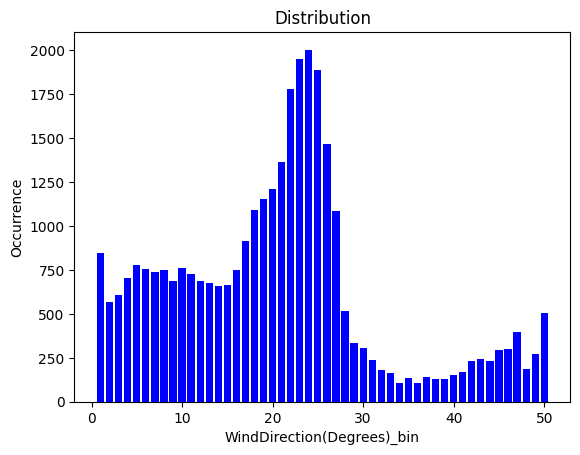

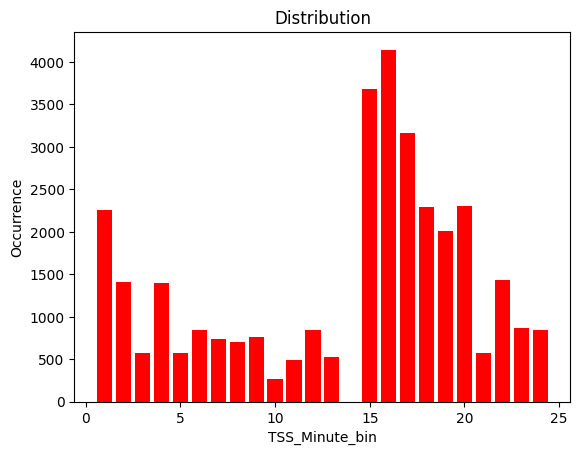

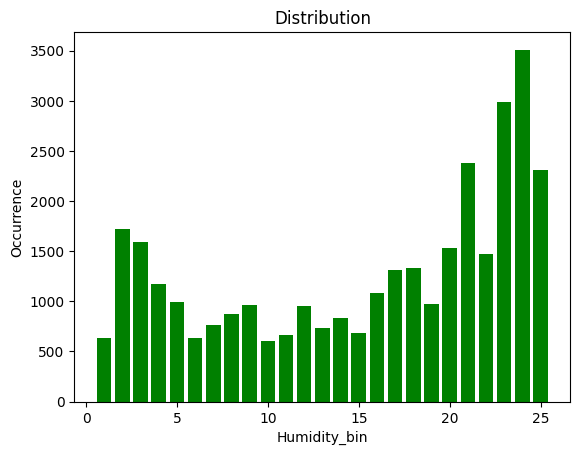

In [14]:
feats = {'WindDirection(Degrees)_bin':'blue', 'TSS_Minute_bin':'red', 'Humidity_bin':'green'}
for i in feats:
    count = Counter(X[i])
    plt.bar(count.keys(), count.values(), color=feats[i])
    plt.title('Distribution')
    plt.ylabel('Occurrence')
    plt.xlabel(i)
    plt.show()

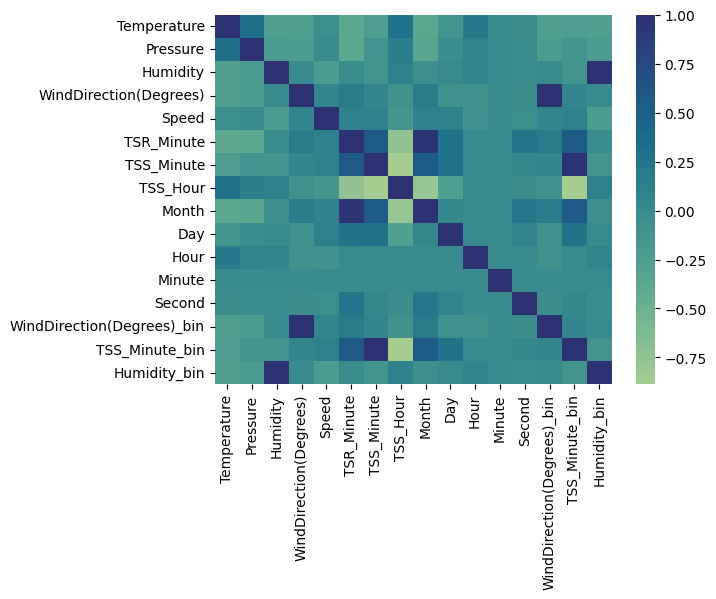

In [15]:
sns.heatmap(X.corr(),cmap="crest")
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

Epoch 1: MSE Training Loss 84498.19171556771 - MSE Testing Loss 80891.1790548333 - MAE Testing Loss 219.7459330070358 - RMSE Testing Loss 284.41374624802035
Epoch 2: MSE Training Loss 52257.633613941965 - MSE Testing Loss 51660.37483641786 - MAE Testing Loss 181.6339752217803 - RMSE Testing Loss 227.2891876804039
Epoch 3: MSE Training Loss 32455.080055269224 - MSE Testing Loss 32766.597889339246 - MAE Testing Loss 123.29949066992965 - RMSE Testing Loss 181.01546312218537
Epoch 4: MSE Training Loss 27696.440651484056 - MSE Testing Loss 27749.332900045883 - MAE Testing Loss 99.60267513000919 - RMSE Testing Loss 166.58131017627963
Epoch 5: MSE Training Loss 26188.005469080817 - MSE Testing Loss 26082.69699304069 - MAE Testing Loss 92.75676200672989 - RMSE Testing Loss 161.50138387345382
Epoch 6: MSE Training Loss 25143.984212545198 - MSE Testing Loss 25111.840504817985 - MAE Testing Loss 89.1196772713368 - RMSE Testing Loss 158.46715907347485
Epoch 7: MSE Training Loss 24260.851539002066 

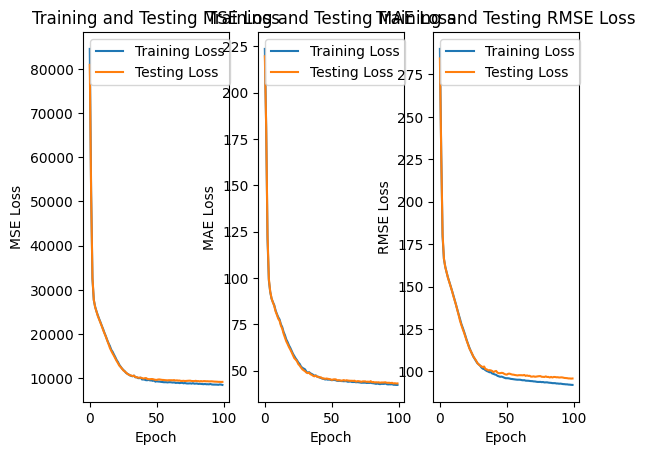

W1: [[ 0.61423737  0.13979425  0.05368499 ...  0.37533888  0.33365444
   0.33362557]
 [ 0.16645572 -0.09655267  0.27320391 ... -0.01621384  0.75813716
   0.30093148]
 [-0.59863821  0.31919684 -0.07285464 ...  0.16351646  0.31130884
   0.36125113]
 ...
 [-0.12791176 -0.10952075 -0.18168651 ...  0.17325513 -0.43661146
  -0.08775702]
 [-0.53162872 -0.57003306  0.08623129 ...  0.37964925  0.12644098
   0.16236603]
 [-0.14773817  0.2043763  -0.10801752 ... -0.02375184 -0.19458208
   0.02717485]]
W2: [[ 0.21573547 -0.09414229  0.42764789 ...  0.22056231  0.13306529
   0.09093206]
 [-0.09818382 -0.23609083 -0.14413871 ... -0.3373237   0.36340071
   0.17520153]
 [-0.74670374 -0.92238531 -0.69512405 ... -0.13314069  1.01280767
  -0.88121928]
 ...
 [ 0.21828592  0.17962644  0.39620635 ...  0.10714431  0.36151943
   0.36295347]
 [ 0.02030697  0.03966252  0.25322716 ...  0.24468454  0.01047169
   0.31454605]
 [-0.24447814  0.20902517 -0.59719507 ... -0.59362618  0.64076245
   0.03806595]]
W3: [[-0

In [27]:
from NeuralNetwork import Net
net1 = Net(iterations=100,learning_rate=0.0001)
model = net1.fit(X_train, y_train,X_test,y_test,"SGD",batch_size=128)
RMSE, MSE, MAE = net1.evaluate(X_test,y_test)
print("RMSE Error on Test Data: {}".format(RMSE))
print("MSE Error on Test Data: {}".format(MSE))
print("MAE Error on Test Data: {}".format(MAE))
net1.plot_loss()
print("W1:",net1.params["W1"])
print("W2:",net1.params["W2"])
print("W3:",net1.params["W3"])
print("W4:",net1.params["W4"])
print("b1:",net1.params["b1"])
print("b2:",net1.params["b2"])
print("b3:",net1.params["b3"])
print("b4:",net1.params["b4"])

Epoch 1: MSE Training Loss 24524.57292095188 - MSE Testing Loss 23945.331330758636 - MAE Testing Loss 84.57766748241053 - RMSE Testing Loss 154.7427908846116
Epoch 2: MSE Training Loss 18000.463263567275 - MSE Testing Loss 18196.48299181707 - MAE Testing Loss 69.06011777301929 - RMSE Testing Loss 134.89434010297492
Epoch 3: MSE Training Loss 14837.03205691187 - MSE Testing Loss 17280.15526774243 - MAE Testing Loss 69.79501835423677 - RMSE Testing Loss 131.45400438078116
Epoch 4: MSE Training Loss 13846.29575529615 - MSE Testing Loss 13252.717687442644 - MAE Testing Loss 57.22926430100949 - RMSE Testing Loss 115.1204486068511
Epoch 5: MSE Training Loss 13177.873754448578 - MSE Testing Loss 12756.945940731111 - MAE Testing Loss 55.97225298256348 - RMSE Testing Loss 112.9466508610641
Epoch 6: MSE Training Loss 11409.366221969813 - MSE Testing Loss 13750.963291602935 - MAE Testing Loss 58.94352860201897 - RMSE Testing Loss 117.26450141284418
Epoch 7: MSE Training Loss 10935.779177048325 - 

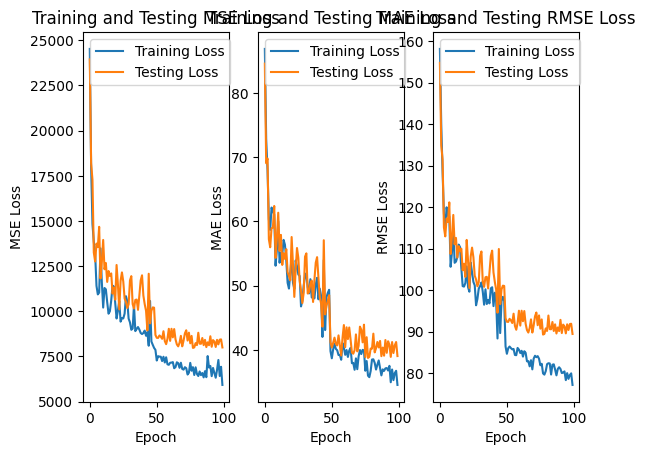

W1: [[ 0.84344673  0.55201376  0.43490296 ...  0.25143393  0.55387576
   0.46200728]
 [-0.77484469 -0.6113044   0.60758441 ... -0.51830702  0.77394548
  -0.37233499]
 [-1.08186863  1.49199495  0.35119727 ... -0.36158876  0.25670924
   0.23443209]
 ...
 [-0.67795023  0.04381341  0.01371915 ... -0.16669404 -0.07472527
  -0.17446139]
 [-0.75132371 -0.1221617   0.16470165 ... -0.54177225  0.22373536
   0.18037869]
 [-0.53663583  1.69638022  0.4298469  ... -0.4816351  -0.17378851
   0.06307817]]
W2: [[ 0.90892533 -0.46417925  0.18854245 ...  0.26006188  1.1724907
   0.19348919]
 [-0.24870394 -0.59738518 -0.11389108 ...  0.7096929   0.5343666
   0.06629958]
 [ 0.01246023 -1.12281538  0.01670629 ...  0.67551321 -0.63274264
   0.94204742]
 ...
 [-0.06554991 -0.01662309  0.34324399 ...  0.19656198  0.21372146
   0.8491161 ]
 [ 0.00894184  0.22193575  0.25074384 ...  0.93739865 -0.28564207
   0.80971857]
 [ 0.08181869 -0.09706762 -0.59844898 ... -0.44640352  1.24829236
   0.40429809]]
W3: [[-2.0

In [18]:
from NeuralNetwork import Net
net = Net(iterations=100,learning_rate=0.001)
model = net.fit(X_train, y_train,X_test,y_test,"SGD",batch_size=128)
RMSE, MSE, MAE = net.evaluate(X_test,y_test)
print("RMSE Error on Test Data: {}".format(RMSE))
print("MSE Error on Test Data: {}".format(MSE))
print("MAE Error on Test Data: {}".format(MAE))
net.plot_loss()
print("W1:",net.params["W1"])
print("W2:",net.params["W2"])
print("W3:",net.params["W3"])
print("W4:",net.params["W4"])
print("b1:",net.params["b1"])
print("b2:",net.params["b2"])
print("b3:",net.params["b3"])
print("b4:",net.params["b4"])

Epoch 1: MSE Training Loss 55728.93116341628 - MSE Testing Loss 55021.06624357602 - MAE Testing Loss 190.0062266748241 - RMSE Testing Loss 234.56569707349797
Epoch 2: MSE Training Loss 29922.963114574653 - MSE Testing Loss 29991.51256661058 - MAE Testing Loss 110.06360813704497 - RMSE Testing Loss 173.18057791395253
Epoch 3: MSE Training Loss 26705.87722513689 - MSE Testing Loss 26786.226934918937 - MAE Testing Loss 95.84349495258489 - RMSE Testing Loss 163.66498383869086
Epoch 4: MSE Training Loss 24820.143269656506 - MSE Testing Loss 24805.422679795043 - MAE Testing Loss 88.75165035178955 - RMSE Testing Loss 157.497373564752
Epoch 5: MSE Training Loss 23695.26098650939 - MSE Testing Loss 23524.07967581829 - MAE Testing Loss 84.65964362190272 - RMSE Testing Loss 153.3756163013479
Epoch 6: MSE Training Loss 22569.21978983462 - MSE Testing Loss 22418.347225527683 - MAE Testing Loss 81.16941113490364 - RMSE Testing Loss 149.72757670358416
Epoch 7: MSE Training Loss 21385.278383278845 - M

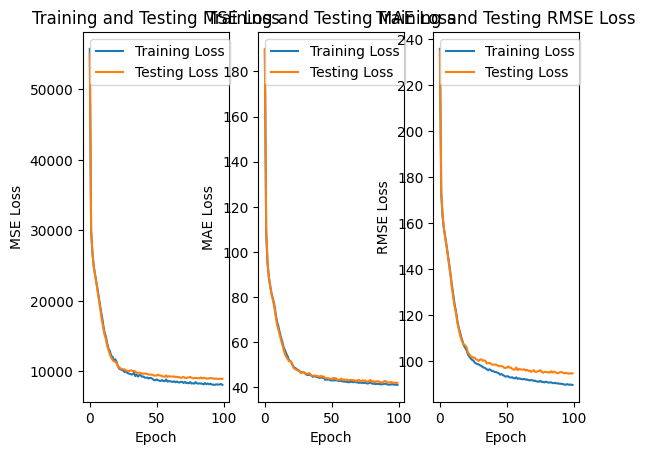

W1: [[ 0.5046127  -0.21550965 -0.03232441 ...  0.31926087  0.4763397
   0.4953403 ]
 [ 0.15859574  0.04441046  0.4213253  ... -0.26950868  0.87884027
   0.28088924]
 [-0.52455599  0.62477047 -0.19084969 ...  0.42993157  0.27978961
   0.28345186]
 ...
 [-0.07101842 -0.04656512 -0.22290768 ...  0.09570371 -0.46731345
  -0.02616422]
 [-0.57822673 -0.58296102  0.0957766  ... -0.10311367  0.12076421
   0.18267474]
 [-0.0952519   0.52258855 -0.21774668 ...  0.22151081 -0.23515559
   0.00195099]]
W2: [[ 0.28025595 -0.17651245  0.47766468 ...  0.2707273   0.13162158
   0.14599356]
 [ 0.00551908 -0.20010347 -0.08096651 ... -0.10355612  0.30176725
   0.00834443]
 [-0.74712848 -1.00772695 -0.56500251 ... -0.22366149  1.01105769
  -0.27533704]
 ...
 [ 0.11128559 -0.06519378  0.36927227 ...  0.16551113  0.34178269
   0.29524551]
 [ 0.0416482   0.06173961  0.23378816 ...  0.34769435  0.04022399
   0.18394549]
 [-0.16585726  0.19987073 -0.57381489 ... -0.41113124  0.59245333
  -0.07011178]]
W3: [[-0.

In [19]:
from NeuralNetwork import Net
net = Net(iterations=100,learning_rate=0.0001)
model = net.fit(X_train, y_train,X_test,y_test,"SGD",batch_size=64)
RMSE, MSE, MAE = net.evaluate(X_test,y_test)
print("RMSE Error on Test Data: {}".format(RMSE))
print("MSE Error on Test Data: {}".format(MSE))
print("MAE Error on Test Data: {}".format(MAE))
net.plot_loss()
print("W1:",net.params["W1"])
print("W2:",net.params["W2"])
print("W3:",net.params["W3"])
print("W4:",net.params["W4"])
print("b1:",net.params["b1"])
print("b2:",net.params["b2"])
print("b3:",net.params["b3"])
print("b4:",net.params["b4"])

Epoch 1: MSE Training Loss 143059.3036616827 - MSE Testing Loss 135356.66049564088 - MAE Testing Loss 199.21379167941268 - RMSE Testing Loss 367.90849473155805
Epoch 2: MSE Training Loss 142817.7811187326 - MSE Testing Loss 135133.36334054757 - MAE Testing Loss 199.07688436830833 - RMSE Testing Loss 367.60490113782157
Epoch 3: MSE Training Loss 142577.10316465094 - MSE Testing Loss 134902.56589484552 - MAE Testing Loss 198.93538543897216 - RMSE Testing Loss 367.29084646209947
Epoch 4: MSE Training Loss 142337.26556968092 - MSE Testing Loss 134675.99819524318 - MAE Testing Loss 198.80282808198228 - RMSE Testing Loss 366.98228594203727
Epoch 5: MSE Training Loss 142098.26413077497 - MSE Testing Loss 134443.19872751605 - MAE Testing Loss 198.67103854389723 - RMSE Testing Loss 366.6649679578294
Epoch 6: MSE Training Loss 141860.0946714011 - MSE Testing Loss 134219.20472017437 - MAE Testing Loss 198.5565356378097 - RMSE Testing Loss 366.3593928373809
Epoch 7: MSE Training Loss 141622.753041

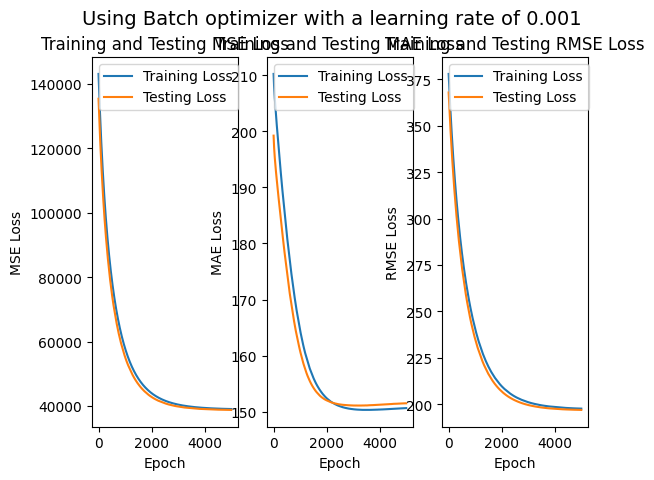

In [20]:
from LinearRegression import LR
lr = LR("Batch",0.001,5000)
model = lr.fit(X_train, y_train,X_test,y_test,"Batch")
lr.plot_loss("Batch")

Epoch 1: MSE Training Loss 136232.1311894823 - MSE Testing Loss 128827.05208328234 - MAE Testing Loss 198.32361731416336 - RMSE Testing Loss 358.9248557613172
Epoch 2: MSE Training Loss 129902.38240764763 - MSE Testing Loss 122783.99029374427 - MAE Testing Loss 198.15644998470478 - RMSE Testing Loss 350.40546555917797
Epoch 3: MSE Training Loss 124151.44973400317 - MSE Testing Loss 117308.87572353931 - MAE Testing Loss 197.87275160599572 - RMSE Testing Loss 342.50383315160036
Epoch 4: MSE Training Loss 118977.11055008105 - MSE Testing Loss 112395.56490677576 - MAE Testing Loss 197.29523554603855 - RMSE Testing Loss 335.25447783255
Epoch 5: MSE Training Loss 114195.86675454496 - MSE Testing Loss 107866.65453051392 - MAE Testing Loss 196.4409559498317 - RMSE Testing Loss 328.43059317078536
Epoch 6: MSE Training Loss 109748.8863278535 - MSE Testing Loss 103641.54768744265 - MAE Testing Loss 195.10885744876109 - RMSE Testing Loss 321.93407351108806
Epoch 7: MSE Training Loss 105626.0246668

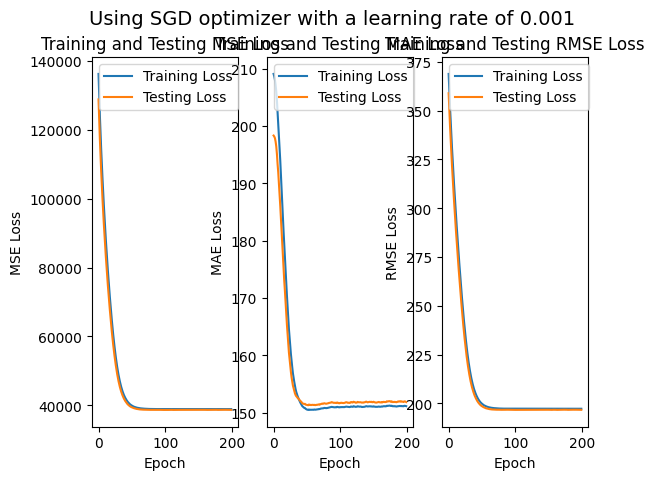

In [21]:
from LinearRegression import LR
lr = LR("SGD",0.001,200)
model = lr.fit(X_train, y_train,X_test,y_test,"SGD")
lr.plot_loss("SGD")

#### Predicting solar irradiance acccording to weather forecast in Dallas, Texas

In [32]:
X = pd.DataFrame(data={"Data": '12/11/2022 12:00:00 PM', "Time":'10:18:00', "Temperature":54, "Pressure":29.97, "Humidity":41, "WindDirection(Degrees)":0,
       "Speed":15, "TimeSunRise":'06:54:00', "TimeSunSet":'17:27:00'},index=[0])
X['TSR_Minute'] = pd.to_datetime(X['TimeSunRise']).dt.minute
X['TSS_Minute'] = pd.to_datetime(X['TimeSunSet']).dt.minute
X['TSS_Hour'] = np.where(pd.to_datetime(X['TimeSunSet']).dt.hour==18, 1, 0)
    
X['Month'] = pd.to_datetime(X['Data']).dt.month
X['Day'] = pd.to_datetime(X['Data']).dt.day
X['Hour'] = pd.to_datetime(X['Time']).dt.hour
X['Minute'] = pd.to_datetime(X['Time']).dt.minute
X['Second'] = pd.to_datetime(X['Time']).dt.second
X = X.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1)
X['WindDirection(Degrees)_bin'] = np.digitize(X['WindDirection(Degrees)'], np.arange(0.0, 1.0, 0.02).tolist())
X['TSS_Minute_bin'] = np.digitize(X['TSS_Minute'], np.arange(0.0, 288.0, 12).tolist())
X['Humidity_bin'] = np.digitize(X['Humidity'], np.arange(32, 3192, 128).tolist())

X = StandardScaler().fit_transform(X)
np.squeeze(net1.predict(X))

array(600.)

#### This weather data was taken from https://weather.com for Dallas, Texas
#### Our model predicted a solar irradiance of 600 for this upcoming Saturday